In [2]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
import numpy as np
from utils.config import opt
from model import FasterRCNNAlexNet
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
from time import time
from glob import glob
from matplotlib import pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
faster_rcnn = FasterRCNNAlexNet()
trainer = FasterRCNNTrainer(faster_rcnn, 5).cuda()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
)
Sequential(
  (0): Linear(in_features=12544, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Linear(in_features=4096, out_features=4096, bias=True)
  (3): ReLU(inplace)
)


You'll need to download pretrained model from [google dirve](https://drive.google.com/open?id=1cQ27LIn-Rig4-Uayzy_gH5-cW-NRGVzY) 
# 1. model converted from chainer

In [7]:
# in this machine the cupy isn't install correctly... 
# so it's a little slow
trainer.load('checkpoints/fasterrcnn_04131557_0.8682983682983685')
opt.caffe_pretrain=False # this model was trained from caffe-pretrained model


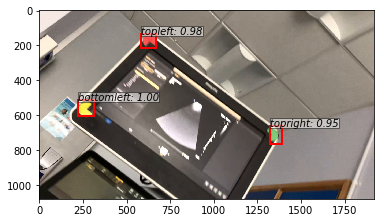

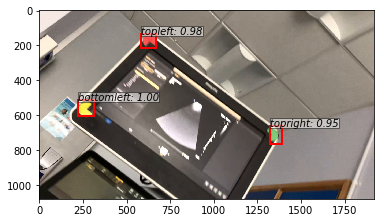

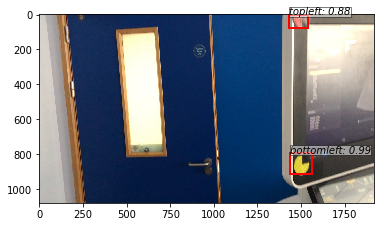

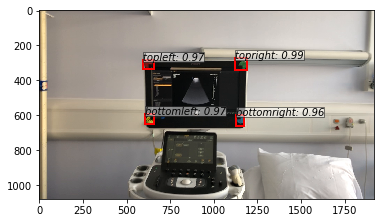

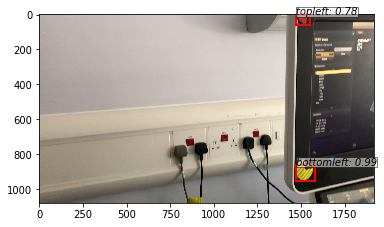

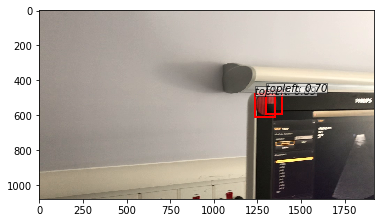

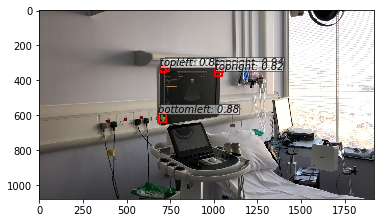

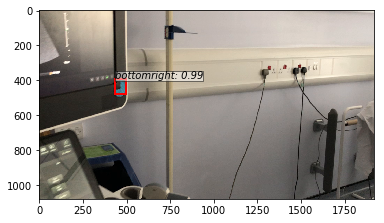

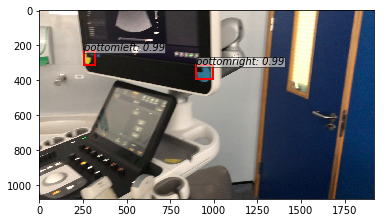

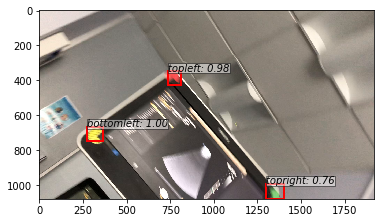

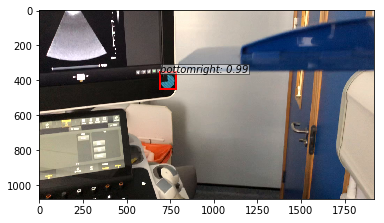

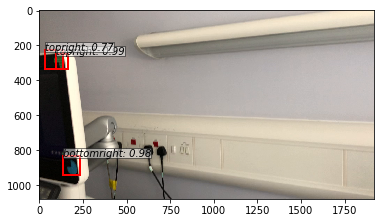

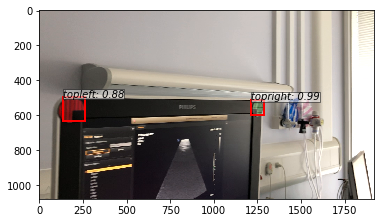

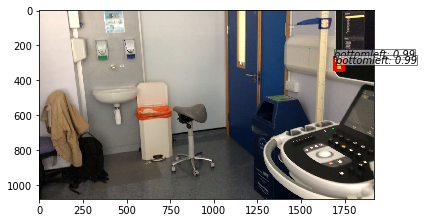

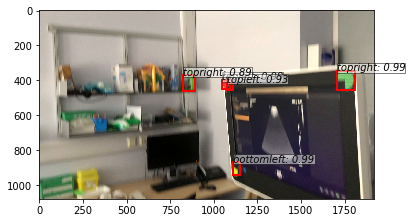

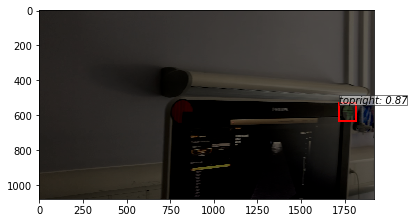

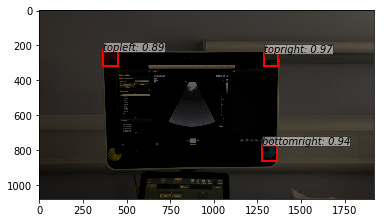

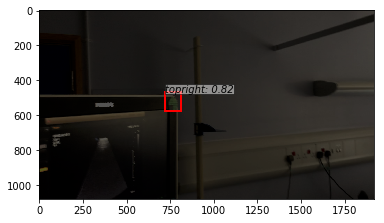

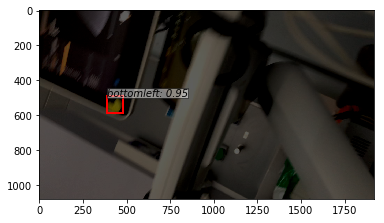

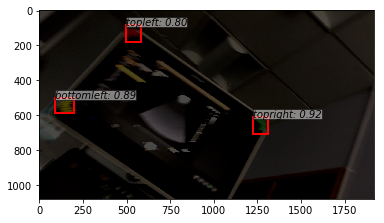

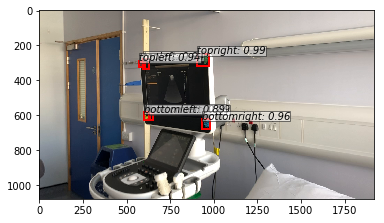

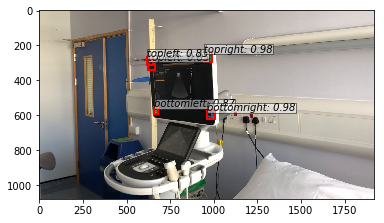

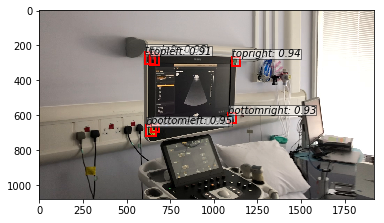

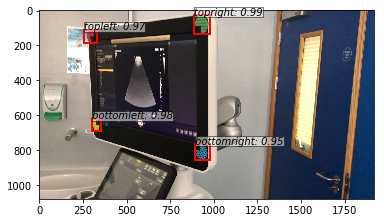

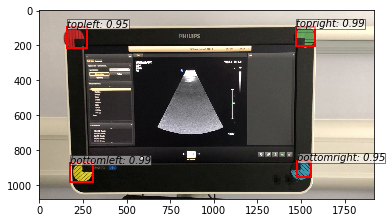

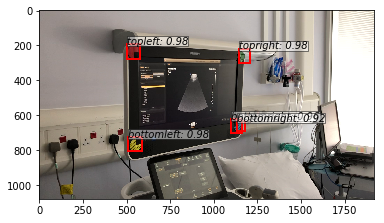

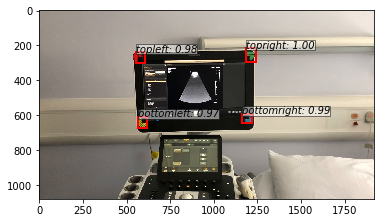

average inference time: 45.35 +/- 2.27


In [6]:
files = glob('misc/marker_image_*.png')
files.sort()

times = np.zeros(len(files))

for idx, f in enumerate(files):
    t1 = 1000 * time()
    img = read_image(f)
    t2 = 1000 * time()
    img = t.from_numpy(img).to('cuda').unsqueeze(0)
    t3 = 1000 * time()
    _bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
    t4 = 1000 * time()
    times[idx] = t4-t3
    vis_bbox(at.tonumpy(img[0]),
             at.tonumpy(_bboxes[0]),
             at.tonumpy(_labels[0]).reshape(-1),
             at.tonumpy(_scores[0]).reshape(-1))
    plt.show()
print(r'average inference time: {:.2f} +/- {:.2f}'.format(np.mean(times), np.std(times)))